In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes = True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/raw_house_data.csv')
df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,NaN
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN


In [5]:
#Code to check for duplicates
#df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
# Check the structure of the Dataset
df.dtypes

,0
MLS,int64
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64


In [7]:
#Check for null/empty values in the dataset and count
df.isnull().sum()

,0
MLS,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,10
taxes,0
year_built,0
bedrooms,0
bathrooms,6


In [8]:
#This is bathrooms column with values Null / Nan
vals = [np.NaN]
maskBath = df["sqrt_ft"].isin(vals)#.sum()
df[maskBath]

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
490,3055989,950000.0,85646,-111.073405,31.619537,4.40,13193.80,2008,3,7.0,NaN,4.0,"Compactor, Dishwasher, Double Sink, Pantry: Bu...",3,"Mexican Tile, Wood, Other",NaN
967,3058213,695000.0,85645,-111.183593,31.702330,NaN,2480.58,1932,4,4.0,NaN,2.0,"Dishwasher, Double Sink, Gas Range, Refrigerat...",,Ceramic Tile,NaN
1064,3056708,785045.0,85646,-110.942060,31.552399,73.42,20761.40,2000,2,6.0,NaN,2.5,"Compactor, Dishwasher, Double Sink, Garbage Di...",7,"Ceramic Tile, Wood",NaN
1373,3059704,750000.0,85622,-111.001762,31.841975,2.72,7169.90,1995,6,7.0,NaN,3.0,"Desk, Dishwasher, Double Sink, Garbage Disposa...",3,Ceramic Tile,NaN
1659,3055188,700000.0,85646,-111.046366,31.623839,NaN,6740.66,2007,3,4.0,NaN,3.0,"Dishwasher, Double Sink, Freezer, Garbage Disp...",,Natural Stone,157
1728,3057818,565000.0,85646,-111.050885,31.627210,0.72,4651.00,1969,3,3.0,NaN,2.0,"Desk, Dishwasher, Electric Range, Garbage Disp...",3,"Mexican Tile, Natural Stone, Wood",21
1729,3044500,675000.0,85629,-110.961128,31.869810,1.02,4662.64,2007,3,4.0,NaN,3.0,"Desk, Dishwasher, Garbage Disposal, Gas Range,...",,"Carpet, Mexican Tile, Wood, Other: Tile-Other",149.5
1730,3053678,700000.0,85645,-111.239637,31.662369,172.76,7501.42,2000,3,3.0,NaN,2.0,"Dishwasher, Electric Range, Garbage Disposal, ...",,"Carpet, Ceramic Tile, Mexican Tile",NaN
1731,3059581,715000.0,85622,-111.040615,31.804808,4.72,3841.03,1998,4,5.0,NaN,5.0,"Double Sink, Electric Range, Garbage Disposal,...",2,"Carpet, Ceramic Tile",NaN


In [9]:
#This is to return indexes or rows for lot_acres column with values Null / Nan
vals = [np.NaN]
mask = df["lot_acres"].isin(vals)
df[mask].index

Index([967, 1659, 2564, 2939, 3420, 3530, 4173, 4286, 4365, 4783], dtype='int64')

In [10]:
#this removes all records/rows with null value in the Lot_acres column. (This is because the Lot_Acres column is not consistent with the Data)
df = df.drop(df.index[df[mask].index], axis=0)#, inplace=True)

In [11]:
df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,NaN
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN


In [12]:
#Updating some few Columns[Garage,fireplaces,HOA,Kitchen_Features,Floor_Covering] with 0 / "Nothing" where the value is null or empty
df["garage"] = df["garage"].fillna(0)
df["HOA"] = df["HOA"].fillna(0)
df["fireplaces"] = df["fireplaces"].replace(" ", 0)

# updating Kitchen_features and Floor_covering to Nothing where value is null
df["kitchen_features"] = df["kitchen_features"].replace(np.NaN, "Nothing")
df["floor_covering"] = df["floor_covering"].replace(np.NaN, "Nothing")
df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,0
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0


In [13]:
#Fixing null / empty values for the bathroom column

zeroBathrooms = df[df["bathrooms"].isnull()] #The immediate code snippet assigns the columns with null values for bathrroms to zeroBathroom
zeroBathrooms
zBathrmsIndex = zeroBathrooms.index #The index of the columns is stored in a variable so that the records can be accessible using their indexes
zBathrmsIndex

Index([2025, 2766, 3108, 3529, 3822, 4812], dtype='int64')

In [14]:
#This code Iterates through the dataframe using the zBathrooms index
for i in zBathrmsIndex:
  bathVals = df[(df["bedrooms"] == df.loc[i, "bedrooms"])][["bathrooms"]].mode() # for every record the mode for bathrooms that have the same number of bedrooms is assigned to a variable
  bathVals = bathVals["bathrooms"] # The bathroom column of the bathVals dataframe is assigned to the variable
  df.loc[i, "bathrooms"] = bathVals[0] # The value of bathVals is assigned to the respective bathroom columns of the indexes
  #print(df.loc[i, "bathrooms"]) # The update values are printed out.

In [15]:
nSqrft = df[df["sqrt_ft"].isnull()]
nSqrft
nSqrftIndex = nSqrft.index
nSqrftIndex

Index([   2,  490, 1064, 1373, 1728, 1729, 1730, 1731, 1863, 2025, 2106, 2108,
       2357, 2401, 2447, 2635, 2636, 2766, 2876, 2915, 2917, 2932, 3108, 3299,
       3372, 3404, 3529, 3531, 3556, 3620, 3647, 3672, 3818, 3819, 3822, 3983,
       3984, 4003, 4020, 4273, 4662, 4723, 4724, 4812, 4991, 4992],
      dtype='int64')

In [16]:
for i in nSqrftIndex:
  sqrtftVals = df[(df["bedrooms"] == df.loc[i, "bedrooms"])][["sqrt_ft"]].mean() // 1 # for every record the mean for sqrt_ft that have the same number of bedrooms is assigned to a variable
  sqrtftVals = sqrtftVals["sqrt_ft"] # The sqrt_ft column of the sqrtftVals dataframe is assigned to the variable
  df.loc[i, "sqrt_ft"] = sqrtftVals # The value of sqrtftVals is assigned to the respective sqrt_ft columns of the indexes
  #print(sqrtftVals) # The value of sqrtftVals is assigned to the respective sqrt_ft columns of the indexes

In [17]:
df.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage
count,4.990000e+03,4.990000e+03,4990.000000,4990.000000,4990.000000,4990.000000,4.990000e+03,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,2.130720e+07,7.749513e+05,85723.223447,-110.911893,32.309526,4.661317,9.412291e+03,1992.316433,3.935471,3.829359,3716.715351,2.812024
std,2.257876e+06,3.187799e+05,37.838772,0.120623,0.176727,51.685230,1.731116e+05,65.542978,1.245817,1.387561,1147.044442,1.197368
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1100.000000,0.000000
25%,2.140750e+07,5.850000e+05,85718.000000,-110.979109,32.277974,0.580000,4.807892e+03,1987.000000,3.000000,3.000000,3049.000000,2.000000
50%,2.161501e+07,6.750000e+05,85737.000000,-110.923309,32.318570,0.990000,6.227810e+03,1999.000000,4.000000,4.000000,3506.000000,3.000000
75%,2.180494e+07,8.367500e+05,85749.000000,-110.859025,32.394625,1.757500,8.091920e+03,2006.000000,4.000000,4.000000,4125.000000,3.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.000000,36.000000,36.000000,22408.000000,30.000000


In [18]:
#Renaming columns
df = df.rename(columns={'sold_price' : 'Sold_Price', 'zipcode' : 'Zipcode', 'longitutde' : 'Longitutde', 'latitude' : 'Latitude', 'lot_acres' : 'Lot_Acres',
                   'taxes' : 'Taxes', 'year_built':'Year_Built', 'bedrooms' : 'Bedrooms', 'bathrooms' : 'Bathrooms', 'sqrt_ft' : 'Sqrt_ft', 'garage' : 'Garage',
                        'kitchen_features' : 'Kitchen_Features', 'fireplaces' : 'Fireplaces', 'floor_covering' : 'Floor_Covering'})

<Axes: xlabel='Sqrt_ft'>

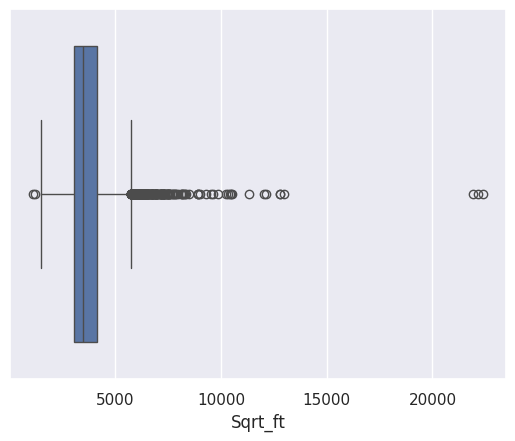

In [19]:
sns.boxplot(x=df["Sqrt_ft"])

Text(0, 0.5, 'Count')

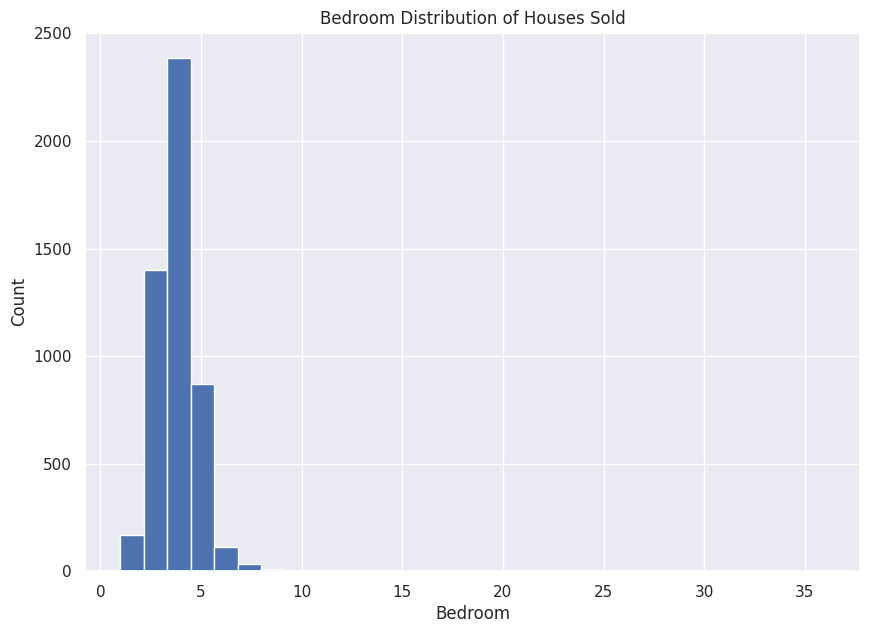

In [22]:
plt.figure(figsize=(10,7))
plt.hist(df['Bedrooms'], bins=30)
plt.title('Bedroom Distribution of Houses Sold')
plt.xlabel('Bedroom')
plt.ylabel('Count')

In [38]:
df = df.drop('Kitchen_Features', axis=1)
df = df.drop('Floor_Covering', axis=1)
df = df.drop('Fireplaces', axis=1)
df = df.drop('HOA', axis=1)

Text(0.5, 1.0, 'Heatmap Correlation')

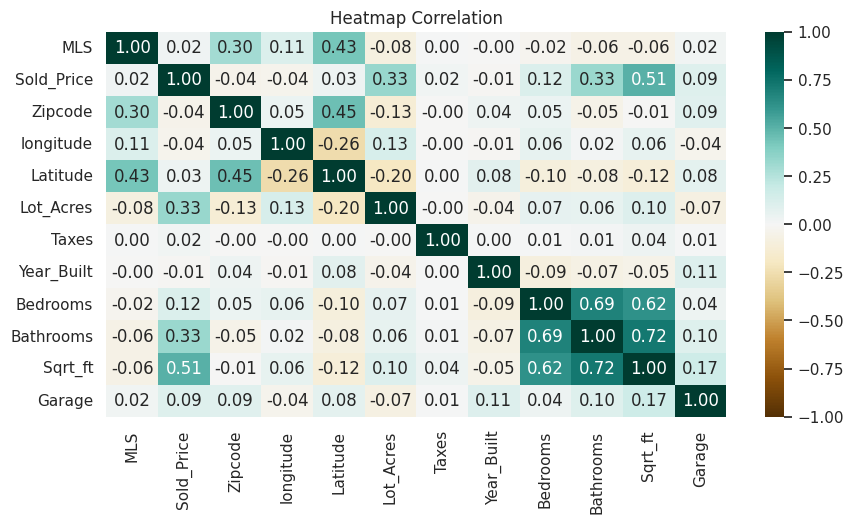

In [40]:
plt.figure(figsize=(10,5))
cor = df.corr()
#sns.heatmap([[h]], cmap="BrBG", annot =True)
sns.heatmap(cor, cmap="BrBG", annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Heatmap Correlation')


Text(0, 0.5, 'Bedrooms')

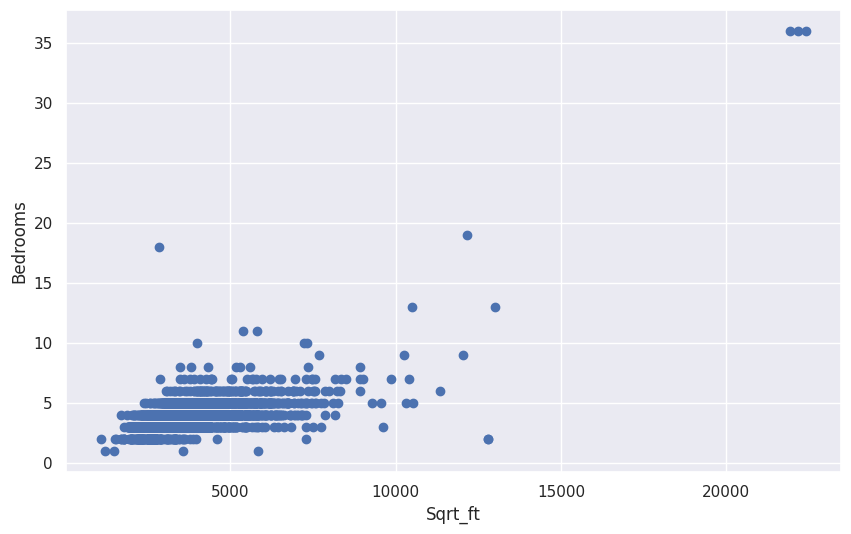

In [23]:
fig, ax =plt.subplots(figsize=(10,6))
ax.scatter(df['Sqrt_ft'],df['Bedrooms'] )
ax.set_xlabel('Sqrt_ft')
ax.set_ylabel('Bedrooms')